In [1]:
#importing train.csv
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#removing unwanted columns in train file
col=['Name','Ticket','Cabin']
df = df.drop(col,axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [3]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
#to see null values in train.csv
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [5]:
#To remove the NaN values from Age column we use inerpolate method.

In [6]:
df['Age'] = df['Age'].interpolate()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,22.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [8]:
#covnverting word to nummbers in csv file.
df.Sex[df.Sex == 'male'] =1
df.Sex[df.Sex == 'female']=0
df

/home/ajay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ajay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,22.5,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [9]:
dummies = []
cols = ['Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))
    
dummies_df = pd.concat(dummies,axis=1)
dummies_df.head()   

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:

df = pd.concat((df,dummies_df),axis=1)
df = df.drop(['Embarked'],axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
dtype: int64

In [12]:
df.groupby(['Age', 'Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 220, dtype: int64

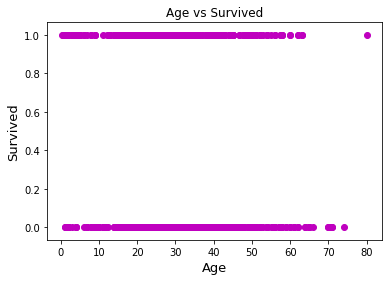

In [48]:
#scatter Plot
import matplotlib.pyplot as plt
plt.title("Age vs Survived")
plt.xlabel("Age",fontsize = 13)
plt.ylabel("Survived",fontsize = 13)
plt.scatter(df.Age,df.Survived,color="m")

In [14]:

df.groupby(['Age', 'Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 220, dtype: int64

<BarContainer object of 3 artists>

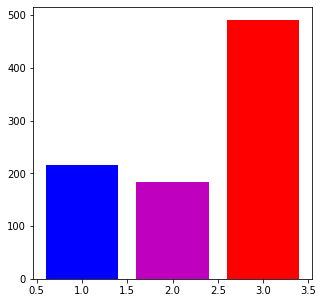

In [15]:
#bar graph
plt.figure(figsize=(5,5))
plt.bar(list(df['Pclass'].value_counts().keys()),list(df['Pclass'].value_counts()),color=['r','b','m'])

In [16]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [17]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

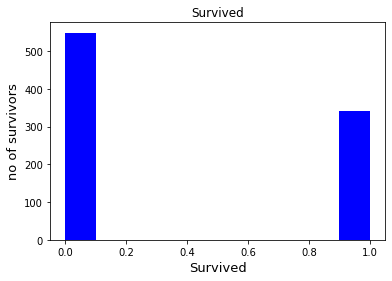

In [18]:
#histogram graph
plt.title("Survived")
plt.xlabel("Survived",fontsize = 13)
plt.ylabel("no of survivors", fontsize = 13)
plt.hist(df.Survived,color=["b"])

(array([ 58.,  60., 207., 229., 160.,  87.,  52.,  26.,  10.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

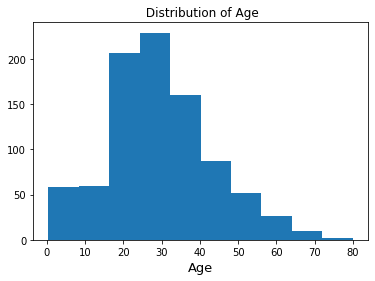

In [19]:
#histogram graph
plt.title(" Distribution of Age")
plt.xlabel("Age",fontsize = 13)
plt.hist(df.Age)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

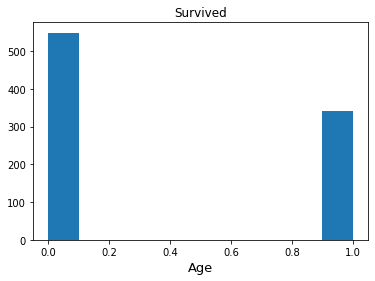

In [20]:
plt.title("Survived")
plt.xlabel("Age",fontsize = 13)
plt.hist(df.Survived)

#applying models on this clean dataset


In [21]:
X = df.drop(['Survived','PassengerId'],axis=1)
y = df.Survived

In [22]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [23]:
X_test.shape

(268, 9)

In [24]:
X_train.shape

(623, 9)

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
382,3,1,32.000,0,0,7.9250,0,0,1
755,2,1,0.670,1,1,14.5000,0,0,1
279,3,0,35.000,1,1,20.2500,0,0,1
256,1,0,29.500,0,0,79.2000,1,0,0
573,3,0,26.000,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...
364,3,1,32.500,1,0,15.5000,0,1,0
118,1,1,24.000,0,1,247.5208,1,0,0
433,3,1,17.000,0,0,7.1250,0,0,1
468,3,1,28.375,0,0,7.7250,0,1,0


In [26]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
622,3,1,20.00,1,1,15.7417,1,0,0
111,3,0,14.50,1,0,14.4542,1,0,0
357,2,0,38.00,0,0,13.0000,0,0,1
633,1,1,20.50,0,0,0.0000,0,0,1
41,2,0,27.00,1,0,21.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
376,3,0,22.00,0,0,7.2500,0,0,1
725,3,1,20.00,0,0,8.6625,0,0,1
496,1,0,54.00,1,0,78.2667,1,0,0
803,3,1,0.42,0,1,8.5167,1,0,0


In [27]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
cross_val_score(model,X_train,y_train,cv = 5).mean()

0.7655934959349594

In [28]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 10)
model2.fit(X_train,y_train)
cross_val_score(model2,X_train,y_train,cv = 5).mean()

0.7879934959349594

In [29]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train,y_train)

cross_val_score(model3,X_train,y_train,cv = 5).mean()

0.3945122971719014

In [30]:
#Using Support Vector Machine Learning
from sklearn.svm import SVC
model4 = SVC()
model4.fit(X_train,y_train)
cross_val_score(model4,X_train,y_train,cv = 5).mean()

/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/svm/

0.672481300813008

In [31]:
#Using Logestic Regression
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression()
model5.fit(X_train,y_train)

cross_val_score(model5,X_train,y_train,cv = 5).mean()

/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

0.7863934959349594

In [32]:
#The test set should be used to see how well the model performs on unseen data. 
#For the test set, they do not provide the ground truth for each passenger.
# Predict for each passenger in the test set, use the model that we trained to predict whether or not they survived the sinking of the Titanic.
##importing test.csv file

In [33]:
df1 =pd.read_csv("test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
#removing unwanted columns
col = ['Name','Ticket','Cabin']
df1 = df1.drop(col,axis=1)

In [35]:
dummies = []
cols = ['Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df1[col]))
    


In [36]:
dummies_df1 = pd.concat(dummies,axis=1)
dummies_df1.head() 
df1 = pd.concat((df1,dummies_df1),axis=1)
df1 = df1.drop(['Embarked'],axis=1)
df1.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,male,34.5,0,0,7.8292,0,1,0
1,893,3,female,47.0,1,0,7.0000,0,0,1
2,894,2,male,62.0,0,0,9.6875,0,1,0
3,895,3,male,27.0,0,0,8.6625,0,0,1
4,896,3,female,22.0,1,1,12.2875,0,0,1


In [38]:
df1.Sex[df1.Sex == 'male'] =1
df1.Sex[df1.Sex == 'female']=0
df1

/home/ajay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ajay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,0,0,1
414,1306,1,0,39.0,0,0,108.9000,1,0,0
415,1307,3,1,38.5,0,0,7.2500,0,0,1
416,1308,3,1,NaN,0,0,8.0500,0,0,1


In [39]:
df1.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
C               0
Q               0
S               0
dtype: int64

In [40]:
df1.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
C               0
Q               0
S               0
dtype: int64

In [41]:
df1 =df1.interpolate()
df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,33.5,0,0,8.0500,0,0,1
414,1306,1,0,39.0,0,0,108.9000,1,0,0
415,1307,3,1,38.5,0,0,7.2500,0,0,1
416,1308,3,1,38.5,0,0,8.0500,0,0,1


In [42]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
dtype: int64

In [43]:
X_res = df1.drop(['PassengerId'],axis=1)

In [44]:
y_predicted = model.predict(X_res)

In [49]:
sub = pd.DataFrame(df1['PassengerId'])
sub['Survived'] = y_predicted


In [50]:
#final output
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
